# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../cleaned-data-kbk.csv')
df.head()

,Unnamed: 0,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 2337)

In [4]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

            term       rank
74          ajar  73.759380
1902       siswa  34.424785
1923         smk  33.334811
1010     kembang  32.497060
1005       kelas  31.645838
...          ...        ...
737   generation   0.220052
560       doubly   0.220052
1055   komoditas   0.200231
157        arima   0.200231
1813      sarima   0.200231

[2337 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [5]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [6]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Game Technology and Machine Learning Applications                                194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Ketenegakerjaan Teknologi dan Kejuruan                           

# Training Model

## GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.514 total time=   0.0s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.478 total time=   0.0s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.587 total time=   0.0s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.698 total time=   0.0s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.714 total time=   0.0s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.762 total time=   0.0s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.706 total time=   0.0s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.742 total time=   0.0s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.750 total time=   0.0s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.726 total time=   0.0s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.625 total time=   0.0s
[CV 2/10] END .....criterion=gini, max_depth=2

[CV 2/10] END .criterion=log_loss, max_depth=30;, score=0.719 total time=   0.1s
[CV 3/10] END .criterion=log_loss, max_depth=30;, score=0.706 total time=   0.1s
[CV 4/10] END .criterion=log_loss, max_depth=30;, score=0.841 total time=   0.1s
[CV 5/10] END .criterion=log_loss, max_depth=30;, score=0.869 total time=   0.1s
[CV 6/10] END .criterion=log_loss, max_depth=30;, score=0.881 total time=   0.1s
[CV 7/10] END .criterion=log_loss, max_depth=30;, score=0.881 total time=   0.1s
[CV 8/10] END .criterion=log_loss, max_depth=30;, score=0.897 total time=   0.1s
[CV 9/10] END .criterion=log_loss, max_depth=30;, score=0.901 total time=   0.1s
[CV 10/10] END criterion=log_loss, max_depth=30;, score=0.869 total time=   0.1s
[CV 1/10] END criterion=log_loss, max_depth=None;, score=0.652 total time=   0.1s
[CV 2/10] END criterion=log_loss, max_depth=None;, score=0.708 total time=   0.1s
[CV 3/10] END criterion=log_loss, max_depth=None;, score=0.722 total time=   0.1s
[CV 4/10] END criterion=l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='accuracy', verbose=3)

In [8]:
# Tabel hasil GridSearchCV
grid_results = pd.DataFrame(grid.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080901,0.002049,0.000801,0.000400,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.513834,0.478261,0.587302,0.698413,0.714286,0.761905,0.706349,0.742063,0.750000,0.726190,0.667860,0.097587,12
1,0.123896,0.002734,0.000700,0.000458,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.624506,0.624506,0.694444,0.813492,0.849206,0.876984,0.845238,0.892857,0.853175,0.833333,0.790774,0.097481,9
2,0.133376,0.002839,0.000901,0.000300,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.636364,0.691700,0.698413,0.825397,0.888889,0.884921,0.853175,0.908730,0.892857,0.876984,0.815743,0.095553,6
3,0.141990,0.004345,0.000954,0.000358,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.664032,0.691700,0.710317,0.849206,0.888889,0.904762,0.865079,0.908730,0.896825,0.896825,0.827637,0.093127,1
4,0.152853,0.012905,0.000904,0.000301,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.561265,0.612648,0.650794,0.726190,0.765873,0.753968,0.765873,0.773810,0.793651,0.785714,0.718979,0.077162,10
5,0.181990,0.002303,0.000701,0.000459,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.640316,0.679842,0.698413,0.821429,0.857143,0.873016,0.880952,0.876984,0.904762,0.873016,0.810587,0.093262,8
6,0.197770,0.010326,0.000875,0.000306,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.628458,0.715415,0.698413,0.825397,0.865079,0.888889,0.888889,0.900794,0.900794,0.884921,0.819705,0.095515,5
7,0.197026,0.007333,0.000704,0.000461,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.671937,0.699605,0.710317,0.841270,0.873016,0.888889,0.873016,0.888889,0.908730,0.880952,0.823662,0.086872,2
8,0.146890,0.005105,0.000797,0.000399,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.545455,0.620553,0.658730,0.722222,0.753968,0.750000,0.765873,0.781746,0.797619,0.781746,0.717791,0.078660,11
9,0.183173,0.003320,0.000500,0.000500,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.656126,0.703557,0.694444,0.809524,0.861111,0.865079,0.880952,0.880952,0.900794,0.880952,0.813349,0.087887,7


In [9]:
# Peringkat Score Parameter hasil GridSearchCV
grid_results[['rank_test_score', 'params', 'mean_test_score']].sort_values(by=['rank_test_score'])

,rank_test_score,params,mean_test_score
3,1,"{'criterion': 'gini', 'max_depth': None}",0.827637
7,2,"{'criterion': 'entropy', 'max_depth': None}",0.823662
11,3,"{'criterion': 'log_loss', 'max_depth': None}",0.821683
10,4,"{'criterion': 'log_loss', 'max_depth': 30}",0.820887
6,5,"{'criterion': 'entropy', 'max_depth': 30}",0.819705
2,6,"{'criterion': 'gini', 'max_depth': 30}",0.815743
9,7,"{'criterion': 'log_loss', 'max_depth': 20}",0.813349
5,8,"{'criterion': 'entropy', 'max_depth': 20}",0.810587
1,9,"{'criterion': 'gini', 'max_depth': 20}",0.790774
4,10,"{'criterion': 'entropy', 'max_depth': 10}",0.718979


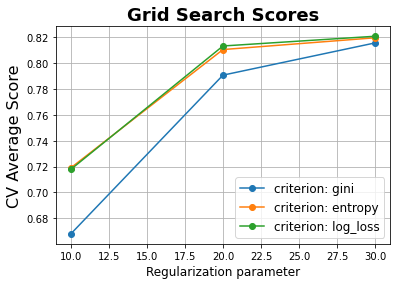

In [10]:
import matplotlib.pyplot as plt

# Plotting hasil GridSearchCV
gini_score = grid_results['mean_test_score'].loc[grid_results['param_criterion'] == 'gini'].to_numpy()
entropy_score = grid_results['mean_test_score'].loc[grid_results['param_criterion'] == 'entropy'].to_numpy()
log_loss_score = grid_results['mean_test_score'].loc[grid_results['param_criterion'] == 'log_loss'].to_numpy()

scores_mean = np.concatenate((gini_score, entropy_score, log_loss_score))

def plot_grid_search(scores_mean, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label=name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=12)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=12)
    ax.grid('on')

# Calling Method 
plot_grid_search(scores_mean, param_grid['max_depth'], param_grid['criterion'], 'Regularization parameter', 'criterion')

In [11]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = None)
model = clf.fit(X_train_resampled,y_train_resampled)

# Evaluation

In [12]:
predictions = model.predict(X_test_tfidf)

In [13]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 3  0  0  0  3  0  0  2  0  2  0  0  3]
 [ 0  4  0  0  0  1  2  2  0  0  5  1  0]
 [ 0  1 13  0  3  0  0  0  2  1  1  6  0]
 [ 0  0  0 10  6  1  0  2  2  0  0  1  2]
 [ 0  1  0  7  9  0  0  0  4  0  1  0  0]
 [ 0  1  0  1  1 11  9  1  0  0  7  0  0]
 [ 0  2  0  0  0  3  7  3  0  0  8  0  0]
 [ 0  4  1  0  0  1  2 56  0  0 19  4  1]
 [ 1  0  9  0  3  1  1  0 16  0  0  2  0]
 [ 1  0  1  0  0  0  0  1  1  1  0  0  2]
 [ 0  6  0  0  0  0  4 10  1  0 41  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0 17  2]
 [ 3  0  0  1  3  0  0  0  0  0  0  1  6]]


In [14]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.38      0.23      0.29        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.21      0.27      0.24        15
                            Game Technology and Machine Learning Applications       0.54      0.48      0.51        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.53      0.42      0.47        24
                         Intelligent Power and Advanced energy System (IPAES)       0.30      0.41      0.35        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.61      0.35      0.45        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.28      0.30      0.29        23
          Pengembangan Aplikasi dan Media Pembe

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.5105263157894737
Precision score :  0.5282575274640718
Recall score :  0.5105263157894737
F1 score :  0.5097234176690663


# Export Model

In [16]:
from joblib import dump

dump(model, filename="dtc-model.joblib")

['dtc-model.joblib']